In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('vgsales.csv', encoding='utf-8')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 1.1

<AxesSubplot:>

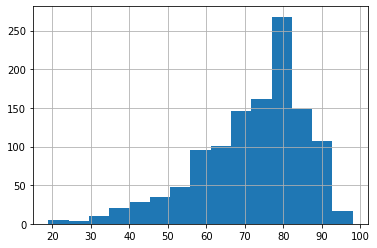

In [2]:
df[df['Genre'] == 'Sports']['Critic_Score'].hist(bins=15)

Видим, что гистаграмма оценок критиков по спортивным играм показала распределение похожее на Нормальное

Нравятся ли критикам Спортивные игры?

Критики ставят оценки спортивным играм > 60

H0: Средняя оценка критиков по спортивным играм меньше 60

H1: Средняя оценка критиков по спортивным играм превышает 60




Распределение нормальное, данные количественные, будем пользоваться Т-тестом Стьюдента, тест одновыборочный, односторонний

In [3]:
from scipy import stats as st
alpha = 0.05
df_without_nan = df.loc[~pd.isnull(df['Critic_Score'])]
df_sports = df_without_nan[df_without_nan['Genre'] == 'Sports']['Critic_Score']
result = st.ttest_1samp(df_sports, 60, alternative='greater')
if result[1] > alpha:
    print("Нет оснований отвергать нулевую гипотезу: Средняя оценка критиков по спортивным играм меньше 60")
else:
    print("Отвергаем основную гипотезу и Не отвергаем альтернативную: Средняя оценка критиков по спортивным играм превышает 60")    

Отвергаем основную гипотезу и Не отвергаем альтернативную: Средняя оценка критиков по спортивным играм превышает 60


## Задание 1.2

<AxesSubplot:>

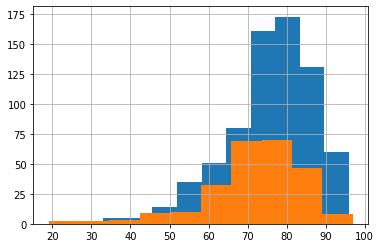

In [4]:
df_ps4 = df_without_nan[df_without_nan['Platform'] == 'PS4']['Critic_Score']
df_pc = df_without_nan[df_without_nan['Platform'] == 'PC']['Critic_Score']

df_pc.hist()
df_ps4.hist()

Критикам нравятся больше игры на PC или PS4?

Критики ставят Большие оценки играм на PC в чем на PS4

H0: Средние оценки критиков по играм на PC меньше, чем на PS4

H1: Средние оценки критиков по играм на PC больше, чем на PS4 

Распределения нормальные, выборки независимые, так как кол-во не пустых значений отличается, отсюда следует предположить, что оценки ставились в достаточной мере разными критиками.

Выбираем Т-тест Стьюдента для независимых выборок

In [5]:
alpha = 0.05
result = st.ttest_ind(df_pc, df_ps4, alternative='greater')
result 
if result[1] > alpha:
    print("Средние оценки критиков по играм на PC меньше, чем на PS4")
else:
    print("Отвергаем основную гипотезу и Не отвергаем альтернативную: Средние оценки критиков по играм на PC больше, чем на PS4")    

Отвергаем основную гипотезу и Не отвергаем альтернативную: Средние оценки критиков по играм на PC больше, чем на PS4


In [6]:
print(df_ps4.mean())
print(df_pc.mean())

72.09126984126983
75.92867132867133


## Задание 1.3

<AxesSubplot:>

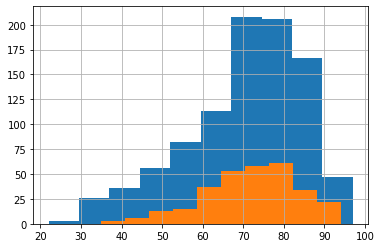

In [7]:
df_shooter = df_without_nan[df_without_nan['Genre'] == 'Shooter']['Critic_Score']
df_strategy = df_without_nan[df_without_nan['Genre'] == 'Strategy']['Critic_Score']

df_shooter.hist()
df_strategy.hist()

Критикам больше нравятся стрелялки или стратегии?

Критики ставят Большие оценки Стрелялкам чем Стратегиям

H0: Средние оценки критиков по Стрелялкам меньше, чем по Стратегиям

H1: Средние оценки критиков по Стрелялкам больше, чем по Стратегиям

In [8]:
alpha = 0.05
result = st.ttest_ind(df_shooter, df_strategy, alternative='greater')

if result[1] > alpha:
    print("Нет оснований отвергать нулевую гипотезу: Средние оценки критиков по Стрелялкам меньше, чем по Стратегиям")
else:
    print("Отвергаем основную гипотезу и Не отвергаем альтернативную: Средние оценки критиков по Стрелялкам больше, чем по Стратегиям")    

Нет оснований отвергать нулевую гипотезу: Средние оценки критиков по Стрелялкам меньше, чем по Стратегиям


In [9]:
print(df_shooter.mean())
print(df_strategy.mean())

70.18114406779661
72.08609271523179


## Задание 2

In [10]:
df_spam = pd.read_csv('spam.csv', encoding='utf-8')
df_spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
# Приведем все к нижнему регистру

def to_lower_case(row):
    return row.lower()

df_spam['Message'] = df_spam['Message'].apply(to_lower_case)
df_spam.head(3)

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...


In [20]:
# Удалим мусорные символы

import re

def delete_rubbish(row):
    return re.sub('[\W_]+',' ', row)

df_spam['Message'] = df_spam['Message'].apply(delete_rubbish)
df_spam.head(5)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [21]:
# Удалим стоп слова и приведем к Лемме

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

word_lemma = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))

def delete_stopwords_and_to_lemma(row, s_set):
    text = row.split()
    return " ".join([word_lemma.lemmatize(word) for word in text if word not in s_set])

df_spam['Message'] = df_spam['Message'].apply(delete_stopwords_and_to_lemma, s_set=stopwords_set)
df_spam.head(5)

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [22]:
# Создадим модель TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam['Message'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
names

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084